In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
user_data = sc.textFile('../wjh/sp_data/ml-100k/u.user')

In [5]:
user_data.first()

'1|24|M|technician|85711'

In [6]:
user_fields = user_data.map(lambda line: line.split("|"))

In [7]:
num_users = user_fields.map(lambda line: line[0]).count()
num_gendres = user_fields.map(lambda line: line[2]).distinct().count()
num_occupations = user_fields.map(lambda line: line[3]).distinct().count()
num_zipcodes = user_fields.map(lambda line: line[4]).distinct().count()
print("Users %d, genders %d, occupations %d, zipcodes %d"%(num_users,num_gendres,num_occupations,num_zipcodes))

Users 943, genders 2, occupations 21, zipcodes 795


In [8]:
ages = user_fields.map(lambda line: int(line[1])).collect()

(array([  2.,   6.,  14.,  87.,  92., 105., 142.,  79.,  65.,  58.,  65.,
         50.,  53.,  58.,  21.,  15.,  17.,   6.,   4.,   4.]),
 array([ 7. , 10.3, 13.6, 16.9, 20.2, 23.5, 26.8, 30.1, 33.4, 36.7, 40. ,
        43.3, 46.6, 49.9, 53.2, 56.5, 59.8, 63.1, 66.4, 69.7, 73. ]),
 <a list of 20 Patch objects>)

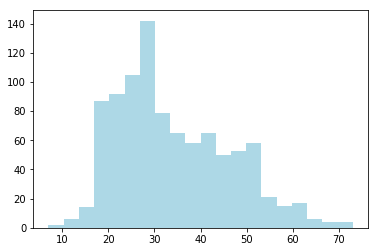

In [9]:
plt.hist(ages,bins=20,color='lightblue')

In [10]:
user_fields.first()

['1', '24', 'M', 'technician', '85711']

In [11]:
# 不同职业的数量
count_by_occupation = user_fields.map(lambda line:(line[3], 1)).reduceByKey(lambda x,y:x+y).collect()